# <b> Imports </b>

In [1]:
# Manipulating Dataset
import pandas as pd
import numpy as np

# Visualizations
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor

# Evaluation
import sklearn.metrics as sm

# Removing Error Messages
import warnings 
warnings.filterwarnings('ignore')

In [2]:
plt.style.use('dark_background')

----

# <b> Loading Data </b>

In [3]:
train_data = pd.read_csv('Train.csv')
test_data = pd.read_csv('Test.csv')

In [4]:
train_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
test_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


---

# <b> Data Structure and Content </b>

In [6]:
train_data.shape

(8523, 12)

In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


> Our dataset has 8523 rows and 12 columns.

> Out of the 12 columns there are 7 columns of 'object' datatype, 4 columns of 'float64' datatype and 1 column of 'int64' datatype.

> The 'Item_Weight' and 'Outlet_Size' columns have null values existing, we will handle them in the preprocessing step.

In [8]:
# Let's split our columns into categorical and numerical

train_data['Outlet_Establishment_Year'] = train_data['Outlet_Establishment_Year'].astype('object')
test_data['Outlet_Establishment_Year'] = test_data['Outlet_Establishment_Year'].astype('object')


categorical_cols = [col for col in train_data.columns if train_data[col].dtype=='object']
numerical_cols = list(set(train_data.columns)- set(categorical_cols))

print('Categorical Columns:', categorical_cols)
print('Numerical Columns:', numerical_cols)

Categorical Columns: ['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']
Numerical Columns: ['Item_Outlet_Sales', 'Item_Weight', 'Item_MRP', 'Item_Visibility']


<h3 style="background-color:darkslategray;"> 1- Categorical Columns </h3>

In [9]:
print('Number of Unique Values in Each Column')
print('---'*13)
for col in categorical_cols:
    print(col, '--->', train_data[col].nunique())

Number of Unique Values in Each Column
---------------------------------------
Item_Identifier ---> 1559
Item_Fat_Content ---> 5
Item_Type ---> 16
Outlet_Identifier ---> 10
Outlet_Establishment_Year ---> 9
Outlet_Size ---> 3
Outlet_Location_Type ---> 3
Outlet_Type ---> 4


> We have 1559 item identifiers in our dataset, which means that we have 1559 different items.

> Let's check the details of each of the other 6 columns.

In [10]:
my_colors = ['#142459', '#176BA0', '#19AADE', '#1AC9E6', '#87EAFA']

<h4 style="color:#1AC9E6;"> .: Item Fat Content :.</h4>

Value	Frequency
-----------------
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64


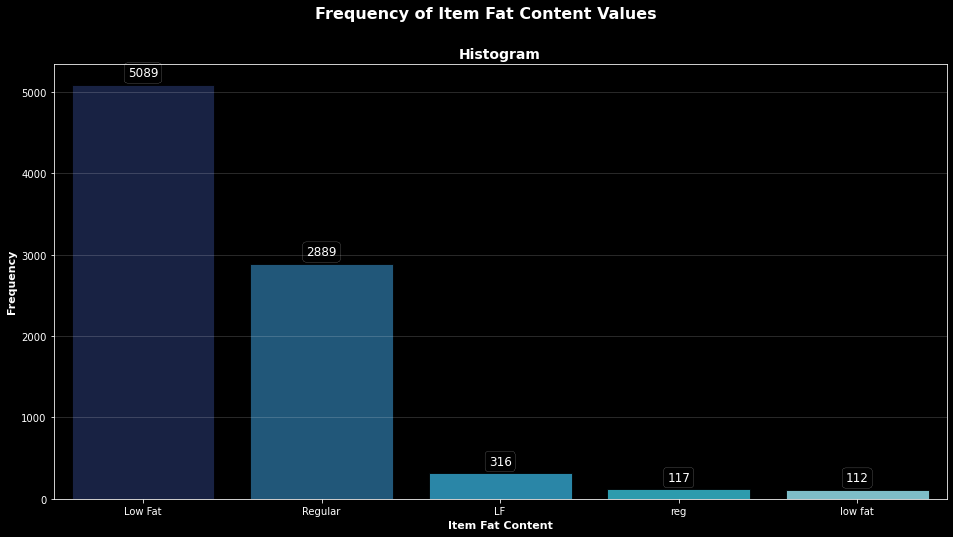

In [11]:
# Big Figure
plt.figure(figsize=(16, 8))
plt.suptitle('Frequency of Item Fat Content Values', fontweight='heavy', fontsize='16', fontfamily='sans-serif', 
             color='white')

# --- Histogram ---
plt.title('Histogram', fontweight='bold', fontsize=14, fontfamily='sans-serif', color='white')
ax = sns.countplot(x='Item_Fat_Content', data=train_data, edgecolor='black', alpha=0.85,palette=my_colors,order=train_data['Item_Fat_Content'].value_counts().index)
for rect in ax.patches:
    ax.text (rect.get_x()+rect.get_width()/2, rect.get_height()+100,rect.get_height(), horizontalalignment='center',
             fontsize=12, bbox=dict(facecolor='none', edgecolor='white', linewidth=0.15, boxstyle='round'))

plt.xlabel('Item Fat Content', fontweight='bold', fontsize=11, fontfamily='sans-serif', color='white')
plt.ylabel('Frequency', fontweight='bold', fontsize=11, fontfamily='sans-serif', color='white')
plt.grid(axis='y', alpha=0.2)


print('Value\tFrequency')
print('-'*17)
print(train_data['Item_Fat_Content'].value_counts())


> Most of the values in that column are 'Low Fat'

> We will need to preprocess that column because we have the same values but with different names.

<h4 style="color:#1AC9E6;"> .: Outlet Size :.</h4>

Value	Frequency
-----------------
Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64


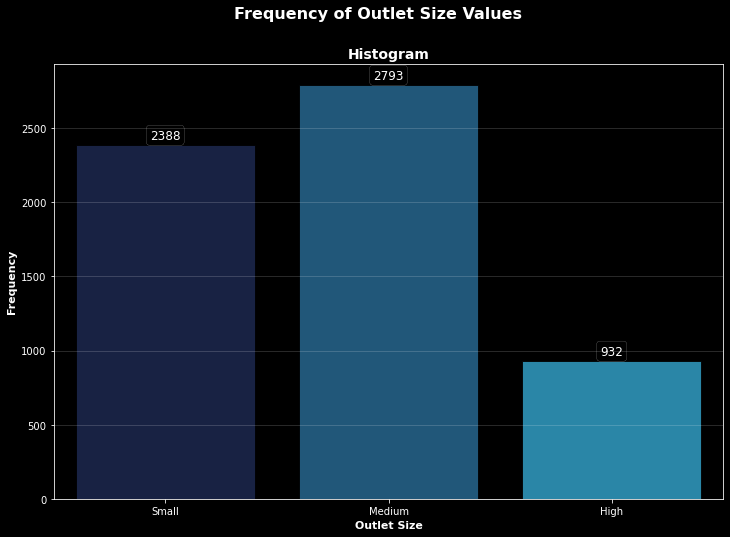

In [12]:
# Big Figure
plt.figure(figsize=(12, 8))
plt.suptitle('Frequency of Outlet Size Values', fontweight='heavy', fontsize='16', fontfamily='sans-serif', 
             color='white')

# --- Histogram ---
plt.title('Histogram', fontweight='bold', fontsize=14, fontfamily='sans-serif', color='white')
ax = sns.countplot(x='Outlet_Size', data=train_data, edgecolor='black', alpha=0.85,palette=my_colors,order=['Small','Medium','High'])
for rect in ax.patches:
    ax.text (rect.get_x()+rect.get_width()/2, rect.get_height()+40,rect.get_height(), horizontalalignment='center',
             fontsize=12, bbox=dict(facecolor='none', edgecolor='white', linewidth=0.15, boxstyle='round'))

plt.xlabel('Outlet Size', fontweight='bold', fontsize=11, fontfamily='sans-serif', color='white')
plt.ylabel('Frequency', fontweight='bold', fontsize=11, fontfamily='sans-serif', color='white')
plt.grid(axis='y', alpha=0.2)


print('Value\tFrequency')
print('-'*17)
print(train_data['Outlet_Size'].value_counts())

> Most of our outlet sizes are between small and medium, we have a little portion of high outlet size.

<h4 style="color:#1AC9E6;"> .: Outlet Location Type :.</h4>

Value	Frequency
-----------------
Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64


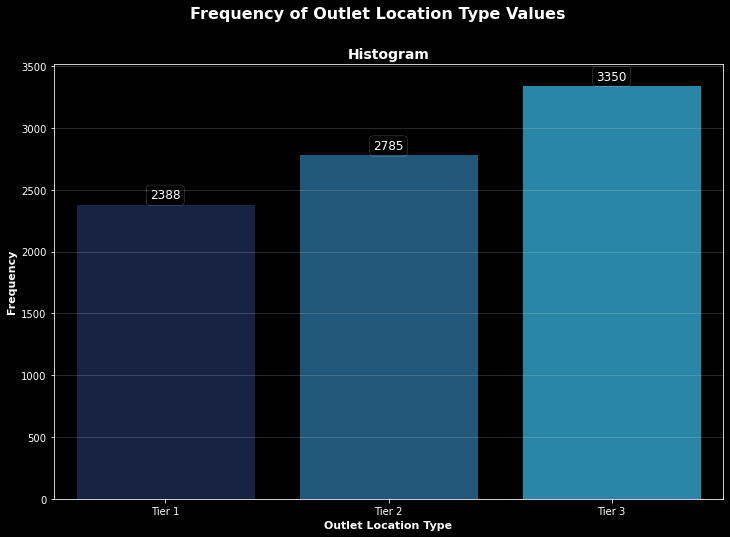

In [13]:
# Big Figure
plt.figure(figsize=(12, 8))
plt.suptitle('Frequency of Outlet Location Type Values', fontweight='heavy', fontsize='16', fontfamily='sans-serif', 
             color='white')

# --- Histogram ---
plt.title('Histogram', fontweight='bold', fontsize=14, fontfamily='sans-serif', color='white')
ax = sns.countplot(x='Outlet_Location_Type', data=train_data, edgecolor='black', alpha=0.85,palette=my_colors,order=['Tier 1','Tier 2','Tier 3'])
for rect in ax.patches:
    ax.text (rect.get_x()+rect.get_width()/2, rect.get_height()+40,rect.get_height(), horizontalalignment='center',
             fontsize=12, bbox=dict(facecolor='none', edgecolor='white', linewidth=0.15, boxstyle='round'))

plt.xlabel('Outlet Location Type', fontweight='bold', fontsize=11, fontfamily='sans-serif', color='white')
plt.ylabel('Frequency', fontweight='bold', fontsize=11, fontfamily='sans-serif', color='white')
plt.grid(axis='y', alpha=0.2)


print('Value\tFrequency')
print('-'*17)
print(train_data['Outlet_Location_Type'].value_counts())

> On the Outlet Location Type column, Tier 3 is more frequent that Tier 2 and Tier 1.

<h4 style="color:#1AC9E6;"> .: Outlet Type :.</h4>

Value		 Frequency
---------------------------
Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64


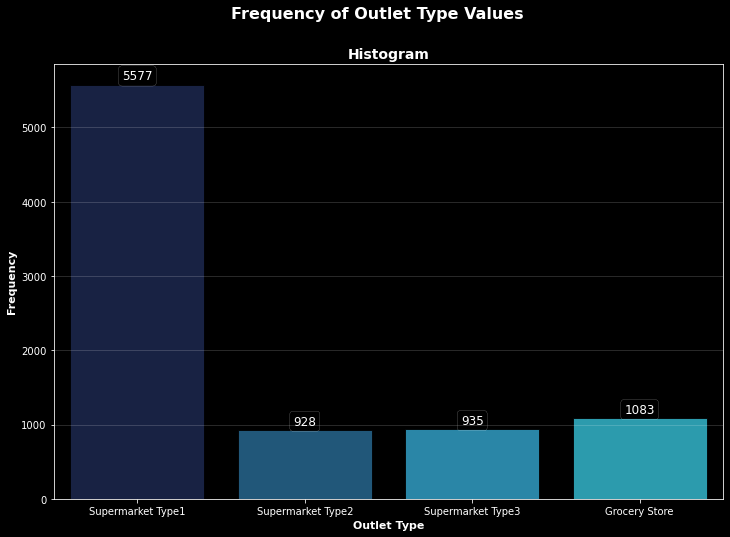

In [14]:
# Big Figure
plt.figure(figsize=(12, 8))
plt.suptitle('Frequency of Outlet Type Values', fontweight='heavy', fontsize='16', fontfamily='sans-serif', 
             color='white')

# --- Histogram ---
plt.title('Histogram', fontweight='bold', fontsize=14, fontfamily='sans-serif', color='white')
ax = sns.countplot(x='Outlet_Type', data=train_data, edgecolor='black', alpha=0.85,palette=my_colors,order=['Supermarket Type1','Supermarket Type2','Supermarket Type3','Grocery Store'])
for rect in ax.patches:
    ax.text (rect.get_x()+rect.get_width()/2, rect.get_height()+70,rect.get_height(), horizontalalignment='center',
             fontsize=12, bbox=dict(facecolor='none', edgecolor='white', linewidth=0.15, boxstyle='round'))

plt.xlabel('Outlet Type', fontweight='bold', fontsize=11, fontfamily='sans-serif', color='white')
plt.ylabel('Frequency', fontweight='bold', fontsize=11, fontfamily='sans-serif', color='white')
plt.grid(axis='y', alpha=0.2)

print('Value\t\t Frequency')
print('-'*27)
print(train_data['Outlet_Type'].value_counts())

> In the Outlet Type Column, Supermarket Type1 is over dominating other outlet types.

<h4 style="color:#1AC9E6;"> .: Outlet Establishment Year :.</h4>

Text(0.5, 0.98, 'Frequency of Outlet Establishment Year Values')

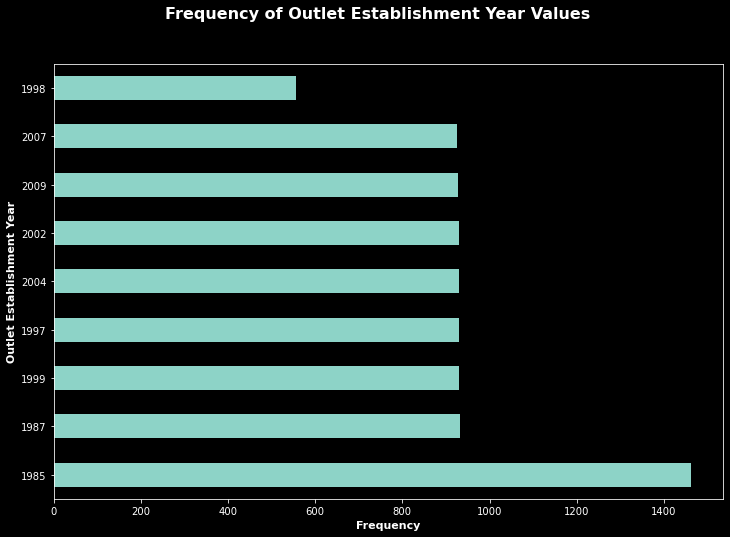

In [15]:
train_data['Outlet_Establishment_Year'].value_counts().plot(kind='barh',figsize=(12,8))
plt.xlabel('Frequency', fontweight='bold', fontsize=11, fontfamily='sans-serif', color='white')
plt.ylabel('Outlet Establishment Year', fontweight='bold', fontsize=11, fontfamily='sans-serif', color='white')
plt.suptitle('Frequency of Outlet Establishment Year Values', fontweight='heavy', fontsize='16', fontfamily='sans-serif',color='white')

> Most of the outlet establishment years in our dataset are in the year 1985.

<h4 style="color:#1AC9E6;"> .: Item Type :.</h4>

Text(0.5, 0.98, 'Frequency of Item Type Values')

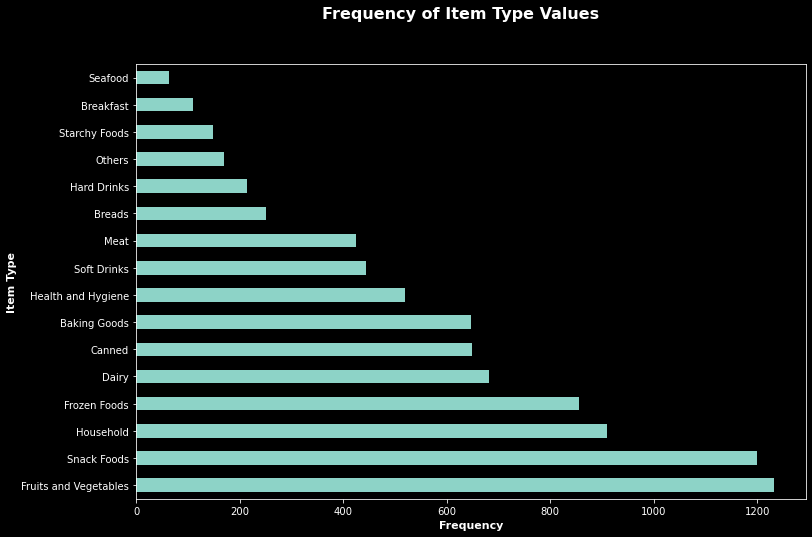

In [16]:
train_data['Item_Type'].value_counts().plot(kind='barh',figsize=(12,8))
plt.xlabel('Frequency', fontweight='bold', fontsize=11, fontfamily='sans-serif', color='white')
plt.ylabel('Item Type', fontweight='bold', fontsize=11, fontfamily='sans-serif', color='white')
plt.suptitle('Frequency of Item Type Values', fontweight='heavy', fontsize='16', fontfamily='sans-serif',color='white')

> The most frequent item types in our dataset is the Fruits&Vegatables and Snacks.

> We don't have so much data about Seafood.

<h4 style="color:#1AC9E6;"> .: Outlet Identifier :.</h4>

Text(0.5, 0.98, 'Frequency of Outlet Identifier Values')

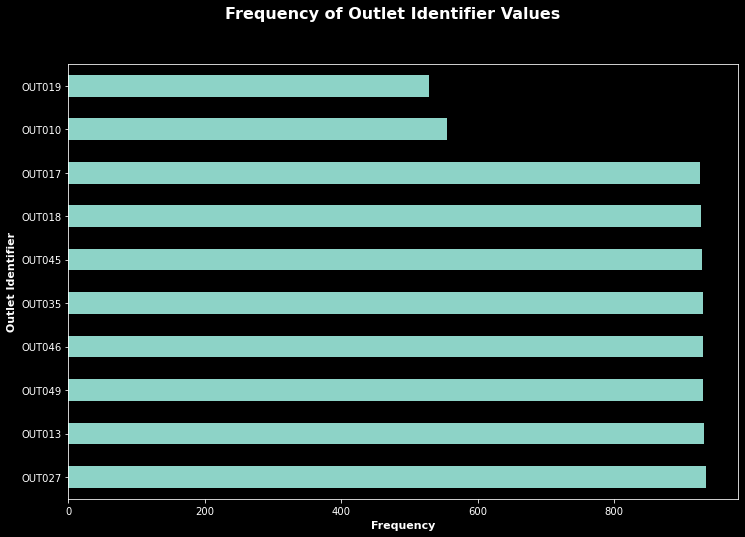

In [17]:
train_data['Outlet_Identifier'].value_counts().plot(kind='barh',figsize=(12,8))
plt.xlabel('Frequency', fontweight='bold', fontsize=11, fontfamily='sans-serif', color='white')
plt.ylabel('Outlet Identifier', fontweight='bold', fontsize=11, fontfamily='sans-serif', color='white')
plt.suptitle('Frequency of Outlet Identifier Values', fontweight='heavy', fontsize='16', fontfamily='sans-serif',color='white')

> All outlet identifiers start with OUT followed by a number.

> Nearly all outlet identifiers have the same frequency in our dataset except for the OUT019 and OUT010 identifiers.

<h3 style="background-color:darkslategray;"> 2- Numerical Columns </h3>

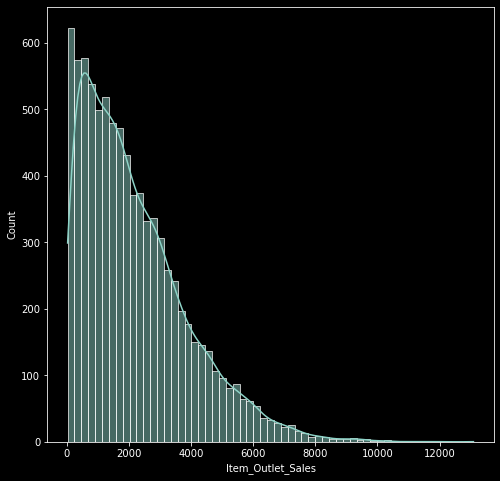

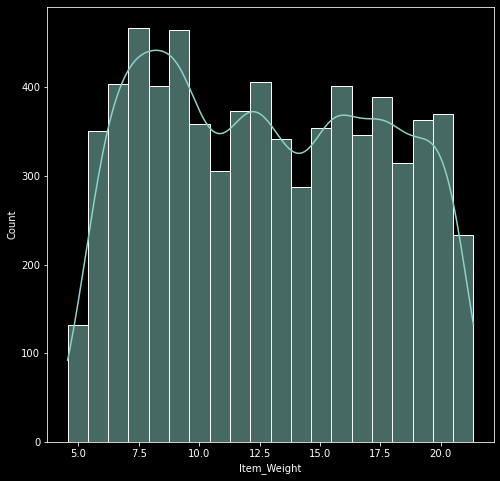

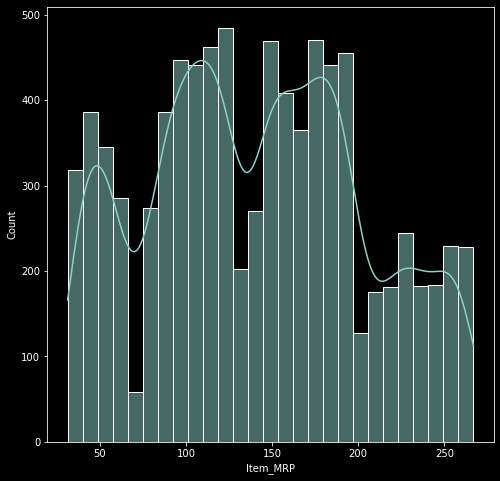

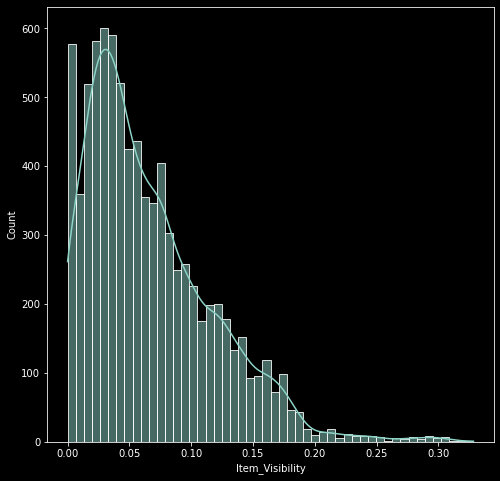

In [18]:
for col in numerical_cols:
    plt.figure(figsize=(8,8))
    sns.histplot(train_data[col],kde=True);
    plt.show();

> Item_Weight, Item_MRP and Outlet_Establishment_Year are normally distributed.

> Item_Visibility and Item_Outlet_Sales are negatively skewed.

> We see that the values of feature columns vary, so we will need to scale them in the preprocessing step.

----

# <b> Exploratory Data Analysis </b>

Text(0.5, 0.98, 'Correlation of Numerical Columns with Item Outlet Sales')

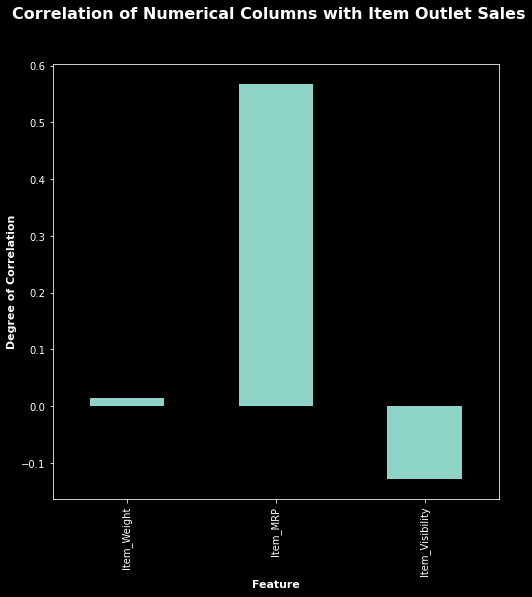

In [19]:
train_data[numerical_cols].drop('Item_Outlet_Sales',axis=1).corrwith(train_data['Item_Outlet_Sales']).plot(kind='bar',figsize=(8,8))

plt.xlabel('Feature', fontweight='bold', fontsize=11, fontfamily='sans-serif', color='white')
plt.ylabel('Degree of Correlation', fontweight='bold', fontsize=11, fontfamily='sans-serif', color='white')
plt.suptitle('Correlation of Numerical Columns with Item Outlet Sales', fontweight='heavy', fontsize='16', fontfamily='sans-serif',color='white')

> Item MRP has strong positive correlation with Item Outlet Sales.

> Item Weight, Outlet Establishment Year and Item Visibility have weak negative correlation with Item Outlet Sales.

In [20]:
categorical_cols

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Establishment_Year',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

Text(0.5, 0.98, 'Item Type vs Item Outlet Sales')

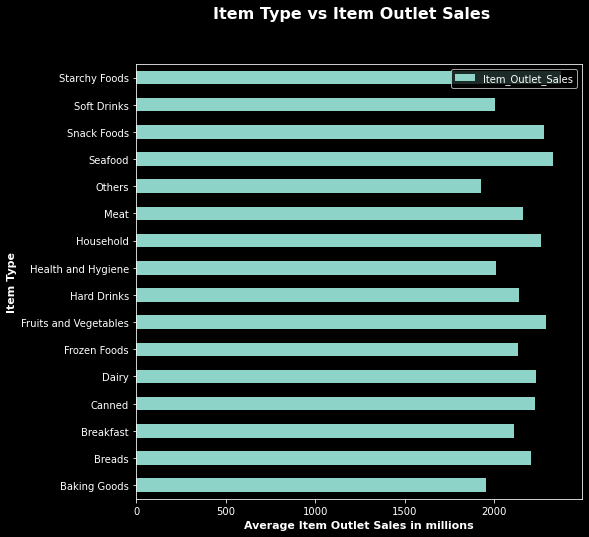

In [21]:
train_data.groupby('Item_Type').agg({'Item_Outlet_Sales':'mean'}).plot(kind="barh",figsize=(8,8))  

plt.xlabel('Average Item Outlet Sales in millions', fontweight='bold', fontsize=11, fontfamily='sans-serif', color='white')
plt.ylabel('Item Type', fontweight='bold', fontsize=11, fontfamily='sans-serif', color='white')
plt.suptitle('Item Type vs Item Outlet Sales', fontweight='heavy', fontsize='16', fontfamily='sans-serif',color='white')

> The average outlet sales of each item type are nearly close to each other, just small differences.

Text(0.5, 0.98, 'Item Fat Content vs Item Outlet Sales')

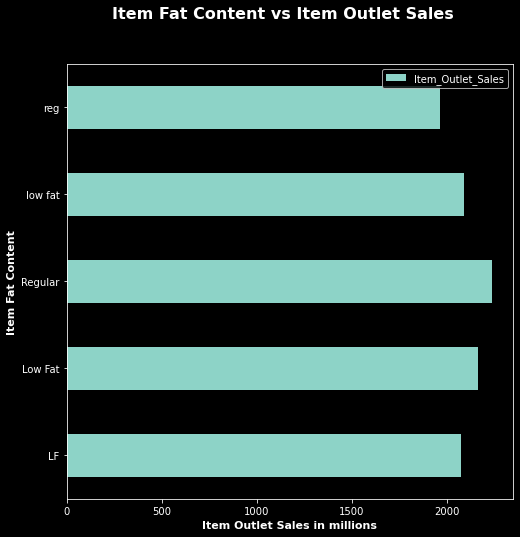

In [22]:
train_data.groupby('Item_Fat_Content').agg({'Item_Outlet_Sales':'mean'}).plot(kind="barh",figsize=(8,8))  

plt.xlabel('Item Outlet Sales in millions', fontweight='bold', fontsize=11, fontfamily='sans-serif', color='white')
plt.ylabel('Item Fat Content', fontweight='bold', fontsize=11, fontfamily='sans-serif', color='white')
plt.suptitle('Item Fat Content vs Item Outlet Sales', fontweight='heavy', fontsize='16', fontfamily='sans-serif',color='white')

> The average is close in case of item fat content as well.

Text(0.5, 0.98, 'Outlet Size vs Item Outlet Sales')

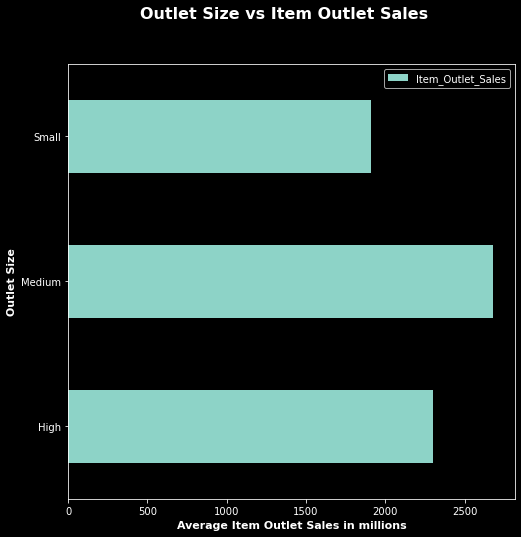

In [23]:
train_data.groupby('Outlet_Size').agg({'Item_Outlet_Sales':'mean'}).plot(kind="barh",figsize=(8,8))  

plt.xlabel('Average Item Outlet Sales in millions', fontweight='bold', fontsize=11, fontfamily='sans-serif', color='white')
plt.ylabel('Outlet Size', fontweight='bold', fontsize=11, fontfamily='sans-serif', color='white')
plt.suptitle('Outlet Size vs Item Outlet Sales', fontweight='heavy', fontsize='16', fontfamily='sans-serif',color='white')

> Medium outlet size has the highest average item outlet sales, followed by the high outlet size and then the small outlet size.

Text(0.5, 0.98, 'Outlet Location Type vs Item Outlet Sales')

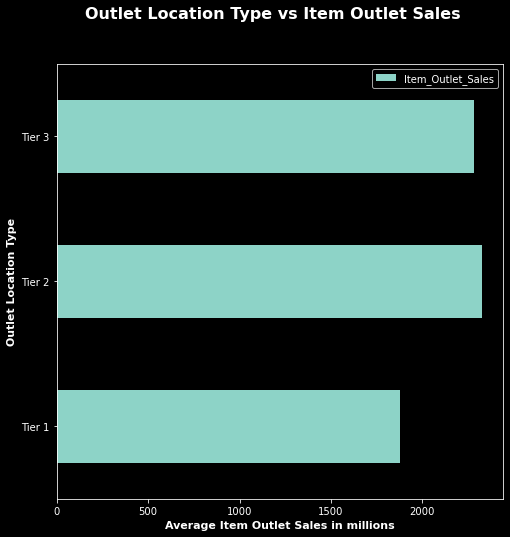

In [24]:
train_data.groupby('Outlet_Location_Type').agg({'Item_Outlet_Sales':'mean'}).plot(kind="barh",figsize=(8,8))  

plt.xlabel('Average Item Outlet Sales in millions', fontweight='bold', fontsize=11, fontfamily='sans-serif', color='white')
plt.ylabel('Outlet Location Type', fontweight='bold', fontsize=11, fontfamily='sans-serif', color='white')
plt.suptitle('Outlet Location Type vs Item Outlet Sales', fontweight='heavy', fontsize='16', fontfamily='sans-serif',color='white')

> In case of location type, Tier 3 and Tier 2 have highest average item outlet sales than Tier 1.

Text(0.5, 0.98, 'Outlet Type vs Item Outlet Sales')

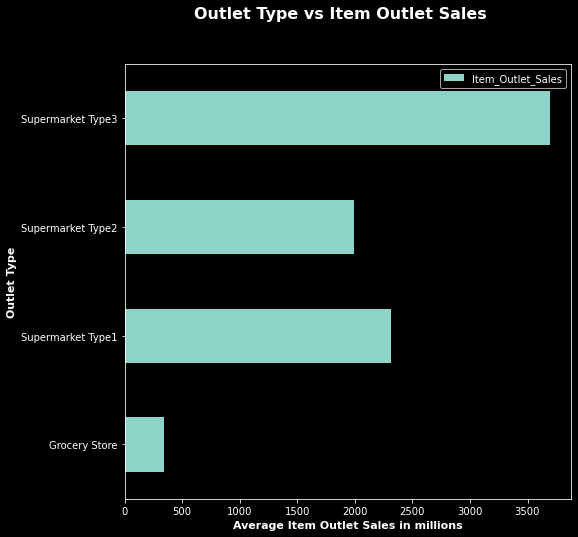

In [25]:
train_data.groupby('Outlet_Type').agg({'Item_Outlet_Sales':'mean'}).plot(kind="barh",figsize=(8,8))  

plt.xlabel('Average Item Outlet Sales in millions', fontweight='bold', fontsize=11, fontfamily='sans-serif', color='white')
plt.ylabel('Outlet Type', fontweight='bold', fontsize=11, fontfamily='sans-serif', color='white')
plt.suptitle('Outlet Type vs Item Outlet Sales', fontweight='heavy', fontsize='16', fontfamily='sans-serif',color='white')

> In case of outlet types, Supermarket Type3 is dominating in terms of average item outlet sales.

> Grocery Stores have a little average item outlet sales.

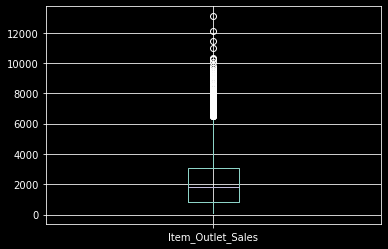

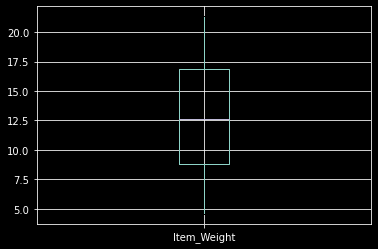

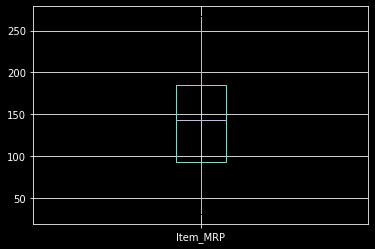

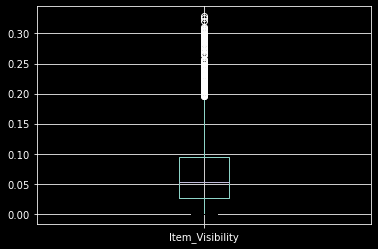

In [26]:
for col in numerical_cols:
    train_data.boxplot(column=col)
    plt.show()

> Item Visibility column has some outliers so we will deal with them in the preprocessing step.

> We won't deal with the outliers that exist in the Item Outlet Sales column because that's our target variable.

----

# <b> Preprocessing </b>

<h3 style="background-color:#134D5E;"> 1- Missing Values Treatment </h3>

> From a previous section, we had null values existing in the Item_Weight and Outlet_Size columns.

> In case of Item_Weight column, we will replace the null values with the mean of that column.

In [27]:
train_data['Item_Weight'].replace(np.nan, train_data['Item_Weight'].mean(), inplace=True)
test_data['Item_Weight'].replace(np.nan, test_data['Item_Weight'].mean(), inplace=True)

In [28]:
train_data.groupby(['Outlet_Type', 'Outlet_Size'], dropna=False)['Item_Identifier'].nunique().reset_index().sort_values(by=['Outlet_Size'], ascending=False)

,Outlet_Type,Outlet_Size,Item_Identifier
0,Grocery Store,Small,528
4,Supermarket Type1,Small,1311
3,Supermarket Type1,Medium,930
6,Supermarket Type2,Medium,928
7,Supermarket Type3,Medium,935
2,Supermarket Type1,High,932
1,Grocery Store,NaN,555
5,Supermarket Type1,NaN,1305


In [29]:
test_data.groupby(['Outlet_Type', 'Outlet_Size'], dropna=False)['Item_Identifier'].nunique().reset_index().sort_values(by=['Outlet_Size'], ascending=False)

,Outlet_Type,Outlet_Size,Item_Identifier
0,Grocery Store,Small,352
4,Supermarket Type1,Small,995
3,Supermarket Type1,Medium,620
6,Supermarket Type2,Medium,618
7,Supermarket Type3,Medium,624
2,Supermarket Type1,High,621
1,Grocery Store,NaN,370
5,Supermarket Type1,NaN,992


> The null values exist in 'Grocery Store' and 'Supermarket Type1' outlet types.

> By looking at the table, we will find that grocery stores are always of size small.

> Also we will find that supermarket type1 has the small outlet size as the most frequent size.

> So, we will replace the null values in that column with 'Small'. 

In [30]:
train_data['Outlet_Size'].replace(np.nan,'Small',inplace=True)
test_data['Outlet_Size'].replace(np.nan,'Small',inplace=True)

In [31]:
train_data.isnull().any()

Item_Identifier              False
Item_Weight                  False
Item_Fat_Content             False
Item_Visibility              False
Item_Type                    False
Item_MRP                     False
Outlet_Identifier            False
Outlet_Establishment_Year    False
Outlet_Size                  False
Outlet_Location_Type         False
Outlet_Type                  False
Item_Outlet_Sales            False
dtype: bool

In [32]:
test_data.isnull().any()

Item_Identifier              False
Item_Weight                  False
Item_Fat_Content             False
Item_Visibility              False
Item_Type                    False
Item_MRP                     False
Outlet_Identifier            False
Outlet_Establishment_Year    False
Outlet_Size                  False
Outlet_Location_Type         False
Outlet_Type                  False
dtype: bool

> Our dataset has no null values now.

<h3 style="background-color:#134D5E;"> 2- Replacing Bad Named Values </h3>

> From a previous section, we discovered that the Item_Fat_Content column has bad named values (Values that are the same but with different names)

> So we will fix that problem now.

In [33]:
train_data['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [34]:
test_data['Item_Fat_Content'].unique()

array(['Low Fat', 'reg', 'Regular', 'LF', 'low fat'], dtype=object)

In [35]:
train_data['Item_Fat_Content'].replace('low fat','Low Fat',inplace=True)
train_data['Item_Fat_Content'].replace('LF','Low Fat',inplace=True)
train_data['Item_Fat_Content'].replace('reg','Regular',inplace=True)

test_data['Item_Fat_Content'].replace('low fat','Low Fat',inplace=True)
test_data['Item_Fat_Content'].replace('LF','Low Fat',inplace=True)
test_data['Item_Fat_Content'].replace('reg','Regular',inplace=True)

In [36]:
train_data['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular'], dtype=object)

In [37]:
test_data['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular'], dtype=object)

> Now we have the 2 values that should have existed from the beginning.

<h3 style="background-color:#134D5E;"> 3- Dropping Duplicates </h3>

In [38]:
train_data.duplicated().sum()

0

In [39]:
test_data.duplicated().sum()

0

> We have no duplicates in our dataset.

<h3 style="background-color:#134D5E;"> 4- Removing Outliers </h3>

> We had an outliers existing in the Item_Visibility column.

> We will work on removing them now.

In [40]:
def remove_outlier(col):
    sorted(col)
    Q1, Q3 = col.quantile([0.25,0.75])
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range, upper_range

In [41]:
low_item_vis, upp_item_vis = remove_outlier(train_data.Item_Visibility)

train_data.Item_Visibility = np.where(train_data.Item_Visibility > upp_item_vis, upp_item_vis, train_data.Item_Visibility)
train_data.Item_Visibility = np.where(train_data.Item_Visibility < low_item_vis, low_item_vis, train_data.Item_Visibility)

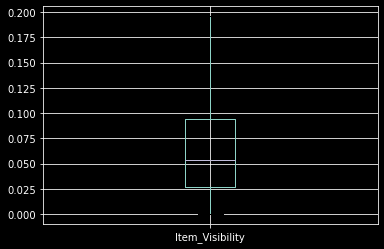

In [42]:
train_data.boxplot(column=['Item_Visibility'])
plt.show()

> Now we have no outliers in our dataset.

<h3 style="background-color:#134D5E;"> 5- Feature Scaling </h3>

> We also discovered that the values of numerical features vary alot which may affect our upcoming models.

> So we will need to scale them.

In [43]:
numerical_cols

['Item_Outlet_Sales', 'Item_Weight', 'Item_MRP', 'Item_Visibility']

In [44]:
standard_scaler = StandardScaler()

train_data['Item_Visibility'] = standard_scaler.fit_transform(train_data[['Item_Visibility']])
train_data['Item_Weight'] = standard_scaler.fit_transform(train_data[['Item_Weight']])
train_data['Item_MRP'] = standard_scaler.fit_transform(train_data[['Item_MRP']])

test_data['Item_Visibility'] = standard_scaler.fit_transform(test_data[['Item_Visibility']])
test_data['Item_Weight'] = standard_scaler.fit_transform(test_data[['Item_Weight']])
test_data['Item_MRP'] = standard_scaler.fit_transform(test_data[['Item_MRP']])


In [45]:
train_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales
count,8.523000e+03,8.523000e+03,8.523000e+03,8523.000000
mean,3.127265e-16,2.046872e-16,-1.644427e-16,2181.288914
std,1.000059e+00,1.000059e+00,1.000059e+00,1706.499616
min,-1.964716e+00,-1.337208e+00,-1.761688e+00,33.290000
25%,-8.395053e-01,-7.845791e-01,-7.574307e-01,834.247400
50%,4.035383e-14,-2.329331e-01,3.243893e-02,1794.331000
75%,7.435985e-01,5.994945e-01,7.170372e-01,3101.296400
max,2.009608e+00,2.675605e+00,2.021724e+00,13086.964800


In [46]:
test_data.describe()

,Item_Weight,Item_Visibility,Item_MRP
count,5.681000e+03,5.681000e+03,5.681000e+03
mean,-1.127616e-17,-1.075046e-16,4.661920e-16
std,1.000088e+00,1.000088e+00,1.000088e+00
min,-1.917783e+00,-1.281690e+00,-1.764188e+00
25%,-8.246845e-01,-7.539239e-01,-7.541832e-01
50%,-5.230960e-14,-2.249774e-01,6.344716e-03
75%,7.431104e-01,5.420473e-01,7.281662e-01
max,2.038809e+00,5.033447e+00,2.031678e+00


<h3 style="background-color:#134D5E;"> 6- Encoding Features </h3>

> We will encode the categorical features so that we can use them in our upcoming models.

> Let's check the cardinality of the categorical columns

In [47]:
for col in categorical_cols:
    print(col, "number of unique values is", train_data[col].nunique())

Item_Identifier number of unique values is 1559
Item_Fat_Content number of unique values is 2
Item_Type number of unique values is 16
Outlet_Identifier number of unique values is 10
Outlet_Establishment_Year number of unique values is 9
Outlet_Size number of unique values is 3
Outlet_Location_Type number of unique values is 3
Outlet_Type number of unique values is 4


> We will apply one hot encoding on low cardinality columns (columns with unique values < 10)

> We will apply label encoding on high cardinality columns (columns with unique values > 10)

In [48]:
low_cardinality_cols = [col for col in categorical_cols if train_data[col].nunique() <= 10]
high_cardinality_cols = [col for col in categorical_cols if train_data[col].nunique() > 10]

print('Low Cardinality Columns:', low_cardinality_cols)
print('High Cardinality Columns:', high_cardinality_cols)

Low Cardinality Columns: ['Item_Fat_Content', 'Outlet_Identifier', 'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']
High Cardinality Columns: ['Item_Identifier', 'Item_Type']


In [49]:
# One Hot Encoding

train_data = pd.get_dummies(train_data, columns = low_cardinality_cols)
test_data = pd.get_dummies(test_data, columns = low_cardinality_cols)

In [50]:
# Label Encoding

le = LabelEncoder()

for col in high_cardinality_cols:
    train_data[col] = le.fit_transform(train_data[col])
    test_data[col] = le.transform(test_data[col])

In [51]:
train_data.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Item_Outlet_Sales,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Outlet_Identifier_OUT010,Outlet_Identifier_OUT013,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,156,-0.841872,-1.008628,4,1.747454,3735.1380,1,0,0,0,...,0,1,0,1,0,0,0,1,0,0
1,8,-1.641706,-0.942473,14,-1.489023,443.4228,0,1,0,0,...,0,1,0,0,0,1,0,0,1,0
2,662,1.098554,-0.994034,10,0.010040,2097.2700,1,0,0,0,...,0,1,0,1,0,0,0,1,0,0
3,1121,1.500838,-1.337208,6,0.660050,732.3800,0,1,1,0,...,0,0,1,0,0,1,1,0,0,0
4,1297,-0.929428,-1.337208,9,-1.399220,994.7052,1,0,0,1,...,1,0,0,0,0,1,0,1,0,0


In [52]:
test_data.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Outlet_Identifier_OUT010,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,1114,1.897460e+00,-1.134077,13,-0.536555,1,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
1,1078,-1.035530e+00,-0.531850,4,-0.868937,0,1,0,0,1,...,0,0,1,0,1,0,0,1,0,0
2,1420,4.486336e-01,0.661316,11,1.629848,1,0,1,0,0,...,0,0,1,0,0,1,1,0,0,0
3,817,-1.267578e+00,-0.981416,13,0.226697,1,0,0,0,1,...,0,0,1,0,1,0,0,1,0,0
4,1197,-5.230960e-14,1.032540,4,1.508110,0,1,0,0,0,...,0,1,0,0,0,1,0,0,0,1


> Now our data is ready to get into model.

-----

# <b> Running Models </b>

In [53]:
def calculate_r2(model):
    model.fit(X_train,y_train)
    predictions = model.predict(X_valid)
    r2 =  round(sm.r2_score(y_valid, predictions), 2)
    return r2

def calculate_mae(model):
    model.fit(X_train,y_train)
    predictions = model.predict(X_valid)
    mae =  round(sm.mean_absolute_error(y_valid, predictions), 2)
    return mae

In [54]:
y = train_data['Item_Outlet_Sales']
X = train_data.drop('Item_Outlet_Sales',axis=1)

X_train, X_valid, y_train, y_valid = train_test_split(X,y,test_size=0.2,shuffle=True,random_state=1)

print('X_train size:', X_train.shape)
print('y_train size:', y_train.shape)
print('X_valid size:', X_valid.shape)
print('y_valid size:', y_valid.shape)

X_train size: (6818, 36)
y_train size: (6818,)
X_valid size: (1705, 36)
y_valid size: (1705,)


<h3 style="background-color:#134D5E;"> 1- Linear Regression </h3>

In [55]:
lr = LinearRegression()
lr.fit(X_train,y_train)
lr_predictions = lr.predict(X_valid)

print("R2 score =", round(sm.r2_score(y_valid, lr_predictions), 2))
print("Mean absolute error =", round(sm.mean_absolute_error(y_valid, lr_predictions), 2)) 

R2 score = 0.56
Mean absolute error = 851.86


<h3 style="background-color:#134D5E;"> 2- Regularized Linear Regression </h3>

In [56]:
lr1 = Ridge(alpha=0, normalize=True,random_state=1)
lr1.fit(X_train, y_train)
lr1_predictions = lr1.predict(X_valid)

print("R2 score =", round(sm.r2_score(y_valid, lr1_predictions), 2))
print("Mean absolute error =", round(sm.mean_absolute_error(y_valid, lr1_predictions), 2)) 

R2 score = 0.56
Mean absolute error = 852.4


In [57]:
lr2 = Lasso(alpha=0.01, normalize=True,random_state=1)
lr2.fit(X_train, y_train)
lr2_predictions = lr2.predict(X_valid)

print("R2 score =", round(sm.r2_score(y_valid, lr2_predictions), 2))
print("Mean absolute error =", round(sm.mean_absolute_error(y_valid, lr2_predictions), 2)) 

R2 score = 0.56
Mean absolute error = 851.79


<h3 style="background-color:#134D5E;"> 3- Random Forest </h3>

In [58]:
rfr = RandomForestRegressor(random_state=1,n_estimators=100)
rfr.fit(X_train,y_train)
rfr_predictions = rfr.predict(X_valid)

print("R2 score =", round(sm.r2_score(y_valid, rfr_predictions), 2))
print("Mean absolute error =", round(sm.mean_absolute_error(y_valid, rfr_predictions), 2)) 

R2 score = 0.56
Mean absolute error = 798.12


In [59]:
rfr_r2_results = list()
rfr_mae_results = list()

for i in range(10,110,10):
    rfr = RandomForestRegressor(random_state=1,n_estimators=i)
  
    rfr_mae_results.append((i,calculate_mae(rfr)))
    rfr_r2_results.append(calculate_r2(rfr))

rfr_mae_results = pd.DataFrame(rfr_mae_results,columns=['n_estimators','mae'])
rfr_r2_results = pd.DataFrame(rfr_r2_results,columns=['r2_score'])

In [60]:
pd.concat([rfr_mae_results,rfr_r2_results],axis=1)

,n_estimators,mae,r2_score
0,10,833.71,0.53
1,20,815.99,0.54
2,30,808.77,0.55
3,40,804.04,0.55
4,50,804.03,0.55
5,60,801.13,0.55
6,70,799.25,0.56
7,80,798.54,0.56
8,90,798.88,0.56
9,100,798.12,0.56


<h3 style="background-color:#134D5E;"> 4- XGBoost </h3>

In [61]:
xgb_r2_results = list()
xgb_mae_results = list()


for i in range(10,110,10):
    xgbregressor = XGBRegressor(random_state=1,n_estimators=i)

    xgb_mae_results.append((i,calculate_mae(xgbregressor)))
    xgb_r2_results.append(calculate_r2(xgbregressor))

xgb_mae_results = pd.DataFrame(xgb_mae_results,columns=['n_estimators','mae'])
xgb_r2_results = pd.DataFrame(xgb_r2_results,columns=['r2_score'])

In [62]:
pd.concat([xgb_mae_results,xgb_r2_results],axis=1)

,n_estimators,mae,r2_score
0,10,767.19,0.59
1,20,781.82,0.58
2,30,790.11,0.57
3,40,802.20,0.56
4,50,812.51,0.55
5,60,819.80,0.54
6,70,822.40,0.54
7,80,828.67,0.53
8,90,833.73,0.53
9,100,837.30,0.52


In [63]:
xgb_r2_results = list()
xgb_mae_results = list()


for lr in [0.001,0.01,0.1,0.003,0.03,0.3,0.4,0.5,0.6,0.7,0.8,0.9]:
    xgbregressor = XGBRegressor(random_state=1,n_estimators=10,learning_rate=lr)

    xgb_mae_results.append((round(lr,3),calculate_mae(xgbregressor)))
    xgb_r2_results.append(calculate_r2(xgbregressor))

xgb_mae_results = pd.DataFrame(xgb_mae_results,columns=['learning_rate','mae'])
xgb_r2_results = pd.DataFrame(xgb_r2_results,columns=['r2_score'])

In [64]:
pd.concat([xgb_mae_results,xgb_r2_results],axis=1)

,learning_rate,mae,r2_score
0,0.001,2118.51,-1.50
1,0.010,1937.64,-1.16
2,0.100,960.89,0.34
3,0.003,2077.05,-1.42
4,0.030,1594.51,-0.57
5,0.300,767.19,0.59
6,0.400,775.07,0.58
7,0.500,785.15,0.56
8,0.600,803.49,0.53
9,0.700,806.27,0.55


<h3 style="background-color:#134D5E;"> 5- Gradient Boost Regressor </h3>

In [65]:
gbr_r2_results = list()
gbr_mae_results = list()


for i in range(10,210,10):
    gbregressor = GradientBoostingRegressor(random_state=1,n_estimators=i)

    gbr_mae_results.append((i,calculate_mae(gbregressor)))
    gbr_r2_results.append(calculate_r2(gbregressor))

gbr_mae_results = pd.DataFrame(gbr_mae_results,columns=['n_estimators','mae'])
gbr_r2_results = pd.DataFrame(gbr_r2_results,columns=['r2_score'])

In [66]:
pd.concat([gbr_mae_results,gbr_r2_results],axis=1)

,n_estimators,mae,r2_score
0,10,939.79,0.50
1,20,819.19,0.58
2,30,781.78,0.60
3,40,771.46,0.60
4,50,766.97,0.60
5,60,765.46,0.60
6,70,765.10,0.60
7,80,764.67,0.60
8,90,764.70,0.60
9,100,764.67,0.60


In [67]:
gbr_r2_results = list()
gbr_mae_results = list()


for lr in [0.001,0.01,0.1,0.003,0.03,0.3,0.4,0.5,0.6,0.7,0.8,0.9]:
    gbregressor = GradientBoostingRegressor(random_state=1,n_estimators=50,learning_rate=lr)

    gbr_mae_results.append((round(lr,3),calculate_mae(gbregressor)))
    gbr_r2_results.append(calculate_r2(gbregressor))

gbr_mae_results = pd.DataFrame(gbr_mae_results,columns=['learning_rate','mae'])
gbr_r2_results = pd.DataFrame(gbr_r2_results,columns=['r2_score'])

In [68]:
pd.concat([gbr_mae_results,gbr_r2_results],axis=1)

,learning_rate,mae,r2_score
0,0.001,1351.44,0.05
1,0.010,1098.91,0.35
2,0.100,766.97,0.60
3,0.003,1282.26,0.14
4,0.030,866.85,0.55
5,0.300,774.93,0.59
6,0.400,775.00,0.58
7,0.500,792.41,0.57
8,0.600,799.56,0.56
9,0.700,803.17,0.55


<head>
<style>
table {
  font-family: arial, sans-serif;
  border-collapse: collapse;
  width: 100%;
}

td, th {
  border: 1px solid #dddddd;
  text-align: left;
  padding: 8px;
}

tr:nth-child(even) {
  background-color: #dddddd;
}
</style>
</head>
<body>

<h2> <center>Models Best Results </center></h2>

<table>
  <tr>
    <th>Model</th>
    <th>R2-Score</th>
    <th>Mean Absoluate Error</th>
  </tr>
  <tr>
    <td>Linear Regression</td>
    <td>0.57</td>
    <td>809.13</td>
  </tr>
  <tr>
    <td>Regularized Linear Regression(Ridge)</td>
    <td>0.57</td>
    <td>811.73</td>
  </tr>
  <tr>
    <td>Regularized Linear Regression(Lasso)</td>
    <td>0.57</td>
    <td>808.91</td>
  </tr>
  <tr>
    <td>Random Forest</td>
    <td>0.56</td>
    <td>759.18</td>
  </tr>
  <tr>
    <td>XGBoost</td>
    <td>0.60</td>
    <td>732.60</td>
  </tr>
  <tr>
    <td>Gradient Boost Regressor</td>
    <td>0.61</td>
    <td>732.48</td>
  </tr>
</table>


> Gradient Boost Regressor with n_estimators = 50 and learning_rate = 0.1 seems to be the best model we had.

---

# <b> Running Best Model On Test Data </b>

In [69]:
test_data.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Outlet_Identifier_OUT010,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,1114,1.897460e+00,-1.134077,13,-0.536555,1,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
1,1078,-1.035530e+00,-0.531850,4,-0.868937,0,1,0,0,1,...,0,0,1,0,1,0,0,1,0,0
2,1420,4.486336e-01,0.661316,11,1.629848,1,0,1,0,0,...,0,0,1,0,0,1,1,0,0,0
3,817,-1.267578e+00,-0.981416,13,0.226697,1,0,0,0,1,...,0,0,1,0,1,0,0,1,0,0
4,1197,-5.230960e-14,1.032540,4,1.508110,0,1,0,0,0,...,0,1,0,0,0,1,0,0,0,1


In [70]:
best_model = GradientBoostingRegressor(random_state=1,n_estimators=50,learning_rate=0.1).fit(X,y)

test_predictions = best_model.predict(test_data)

res = pd.DataFrame(test_predictions)
res.index = test_data.index
res.columns = ["Prediction"]
res.to_csv("prediction_results.csv")

----

# <b> Summary </b>

1 - In the <font color="red"> Imports </font> section, we made the imports we needed along our notebook journey.

2- In the <font color="red"> Loading Data </font>  section, we loaded our training and testing data.

3- In the <font color="red"> Data Structure and Content </font> section, we had an overview of our data, splitted our columns into categorical & numerical columns and made univariate analysis to learn more about our columns.

4- In the <font color="red"> Exploratory Data Analysis </font> section, we carried out bivariate analysis to determine the relation between the feature columns and the target column. We also made box plots in order to check if there are any outliers.

5- In the <font color="red"> Preprocessing </font> section, we filled the null values that were existing, replaced the bad named values, removed outliers, scaled our numerical features and label encoded our categorical features.

6- In the <font color="red"> Running Models </font> section, we tried different models and checked their R2-score and Mean Absolute Error. Then, we made a table of our results and picked the best model among them.

7- In the <font color="red"> Running Best Model On Test Data </font> section, we made our predictions for the test data using the best model from the previous section and saved these predictions in a new csv file. 

---